In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import sys
sys.path.append(r"C:\Users\chaoL\Documents\Project\FI-in-Rset\FI-in-Rset\src")
from visulizer import *
from feature_importance_helper import *
from feature_interaction_score_utilities import *
from FIS_explainer import fis_explainer

# below source code from https://github.com/mtsang/archipelago
sys.path.append("archipelago-baseline/experiments/1. archdetect")
from synthetic_utils import *

sys.path.append("archipelago-baseline/baselines/mahe_madex/madex")
from utils import general_utils as nid_utils
import neural_interaction_detection as nid


%load_ext autoreload
%autoreload 2

## Get Data and Synthetic Function

In [3]:
function_id = 4
p = 40 # num features
input_value, base_value = 1, -1
input = np.array([input_value]*p)
baseline = np.array([base_value]*p)
model = synth_model(function_id, input_value, base_value)
gts = model.get_gts(p)
X, Y = gen_data_samples(model, input_value, base_value, p, n=30000, seed=42)
Xs, Ys = nid_utils.proprocess_data(X, Y, valid_size = 10000, test_size=10000, std_scale_X=True, std_scale=True)

### Get backbone model NID

In [4]:
mlp, inter_scores, mlp_loss = nid.detect_interactions(Xs, Ys, pairwise=True, seed=42)

### Build NID explainer from the trained model

In [5]:
fis_explainer_mlp = fis_explainer(mlp, Xs['test'], Ys['test'], epsilon_rate=0.1, loss_fn='regression', wrapper_for_torch=True, return_ref_main_effects=True, return_ref_pairwise_effects=True)

## NID reference FIS and the best threshold


In [85]:
auc, t = get_auc(fis_explainer_mlp._get_ref_fis(), gts)
print("auc", auc)

Best Threshold is 0.000456
auc 0.5210828750739247


## Explore all fis in Rashomon set


In [86]:
fis_explainer_mlp._get_ref_fis()

[((0, 1), 0.005975417559253168),
 ((0, 2), 0.0070263937918696034),
 ((0, 3), 0.0016002141254523455),
 ((0, 4), 0.0008636821517619825),
 ((0, 5), 0.00043862260462080443),
 ((0, 6), 0.0006189735776426786),
 ((0, 7), 0.0013143535339122728),
 ((0, 8), 0.00138223530294012),
 ((0, 9), 8.670786321737095e-05),
 ((0, 10), 0.00045120481470883184),
 ((0, 11), 0.001663188313373476),
 ((0, 12), 5.5393611541658394e-05),
 ((0, 13), 7.312799144305188e-05),
 ((0, 14), 0.00012821356705791653),
 ((0, 15), 0.0004026416557876139),
 ((0, 16), 0.00022612405301344896),
 ((0, 17), 0.0010646175237087677),
 ((0, 18), 0.0012533067405433654),
 ((0, 19), 0.0004693113305586291),
 ((0, 20), 0.00013399981467610012),
 ((0, 21), 0.000243139649507354),
 ((0, 22), 0.0004464842484886364),
 ((0, 23), 0.0007873239432423934),
 ((0, 24), 0.0015169291036534957),
 ((0, 25), 0.00149035364080774),
 ((0, 26), 0.0002733578665797057),
 ((0, 27), 2.3201751861046116e-05),
 ((0, 28), 0.0005341338572300083),
 ((0, 29), 0.0003006033691029

In [6]:
with open('../results/nid/nid_m_subset_in_R.npy', 'rb') as f:
    m_all = np.load(f)

In [19]:
m, points_all_max, points_all_min, fis_main = fis_explainer_mlp.explore_m_in_R(fis_explainer_mlp.epsilon, fis_explainer_mlp.loss, fis_explainer_mlp.v_list, fis_explainer_mlp.model, Xs['test'], Ys['test'], delta=0.01, regression=fis_explainer_mlp.regression)

KeyboardInterrupt: 

### Find all m in R set

In [6]:
with open('../results/nid/nid_joint_loss_pairwise_all_in_R.npy', 'rb') as f:
    loss_emp_all_pair_set = np.load(f)
with open('../results/nid/nid_joint_effect_pairwise_all_in_R.npy', 'rb') as f:
    joint_effect_all_pair_set = np.load(f)
with open('../results/nid/nid_m_all_set_in_R.npy', 'rb') as f:
     m_all_sub_set = np.load(f)

In [7]:
with open('../results/nid/nid_points_all_max.npy', 'rb') as f:
    nid_points_all_max = np.load(f, allow_pickle=True)
with open('../results/nid/nid_points_all_min.npy', 'rb') as f:
    nid_points_all_min = np.load(f, allow_pickle=True)

In [57]:
# m_all_sub_set = fis_explainer_mlp._get_all_m_with_t_in_range(nid_points_all_max, nid_points_all_min, fis_explainer_mlp.epsilon)
# m_all_sub_set = np.array(m_all_sub_set)

### Explore all main effect, joint effect and FIS

In [17]:
# main_effect_all_pair_set = fis_explainer_mlp._get_all_main_effects(m_all_sub_set, fis_explainer_mlp.input, fis_explainer_mlp.output, fis_explainer_mlp.model)
# main_effect_all_ratio, main_effect_all_diff = main_effect_all_pair_set[0], main_effect_all_pair_set[-1]
# with open('../results/nid/nid_main_effect_all_in_R_ratio.npy', 'wb') as f:
#     np.save(f, main_effect_all_ratio)
# with open('../results/nid/nid_main_effect_all_in_R_diff.npy', 'wb') as f:
#     np.save(f, main_effect_all_diff)

In [8]:
with open('../results/nid/nid_main_effect_all_in_R_diff.npy', 'rb') as f:
    main_effect_all_diff = np.load(f)

In [ ]:
# nid_main_effect_all_in_R_diff, nid_main_effect_all_in_R_ratio = fis_explainer_mlp._get_all_main_effects(m_all_sub_set, fis_explainer_mlp.input, fis_explainer_mlp.output, fis_explainer_mlp.model)

In [24]:
# joint_effect_all_pair_in_R = np.array(joint_effect_all_pair_set).transpose((1, 0, 2)).reshape(len(joint_effect_all_pair_set[-1]), -1)
# np.shape(joint_effect_all_pair_in_R)

(780, 180)

In [9]:
fis_in_r = fis_explainer_mlp._get_fis_in_r(fis_explainer_mlp.all_pairs, joint_effect_all_pair_set, main_effect_all_diff)

In [10]:
loss_in_r = fis_explainer_mlp._get_loss_in_r(fis_explainer_mlp.all_pairs, loss_emp_all_pair_set)

In [66]:
for fis_each_pair in fis_in_r:
    # if np.max(fis_each_pair) < -0.000055:
    print(np.max(fis_each_pair), np.min(fis_each_pair))
    # print(np.max(fis_each_pair), np.min(fis_each_pair))

0.007306241219597387 0.004726973331301704
0.007158274222122188 0.005369551046607392
0.0015563262566149483 2.781577066515023e-05
0.0012353271213573838 2.4987227421335856e-06
0.0015322898261247997 7.001275779308647e-06
0.001173321696269665 7.846179146120402e-07
0.001763231786370792 2.5139201684815093e-05
0.0019159827353062361 9.634211210619859e-06
0.0014132179682257578 1.046983252712963e-06
0.0015291455357928363 7.732521407864679e-06
0.0018919285576578515 0.00016817177478099798
0.0012335793550679874 2.8454519363022013e-06
0.0012799178606372266 9.247589553458557e-06
0.0011773308325484441 3.5526163583224357e-06
0.0014680147289535608 5.5051953125467845e-06
0.0012050871886027728 7.240566564231665e-07
0.001795652966029647 1.8876348133953225e-06
0.0021261213579291185 8.097917352584832e-05
0.0013411810188479825 1.1828209543068846e-07
0.0012473086422354687 3.858331449752006e-07
0.001631172266676327 1.0970514726892089e-05
0.0015810347620532975 1.2079002979274722e-05
0.0011753114074284712 2.405455

In [ ]:
# all joint effect
# joint_effect_all_pair_set = []
# loss_emp_all_pair_set = []
# for m_all in m_all_sub_set:
#     m_all = m_all.transpose((1,0,2))
#     joint_effect_all_pair, loss_emp = Interaction_effect_all_pairs(e_mpl_f4.input, e_mpl_f4.output, e_mpl_f4.v_list, 2, e_mpl_f4.model, m_all, regression=e_mpl_f4.regression)
#     joint_effect_all_pair_set.append(joint_effect_all_pair)
#     loss_emp_all_pair_set.append(loss_emp)

# all main effect
# fi_all_diff = []
# fi_all_ratio = []
# for idx, sub_boundary_rate in enumerate(np.arange(0.2, 1.2, 0.2)):
#     for i in range(40):
#         for j in range(11):
#             for k in range(2):
#                 X0 = X_train.copy()
#                 X0[:, i] = X0[:, i] * m_all_sub_set[idx,i,j,k]
#                 loss_after, loss_before = feature_effect(i, X0, Y_train, model, 30, True)
#                 fi_all_ratio.append(loss_after/loss_before)
#                 fi_all_diff.append(loss_after - loss_before)

# Visualize the FIS range in Swarmplot

In [11]:
fis_ref_l = [i[-1] for i in fis_explainer_mlp._get_ref_fis()]

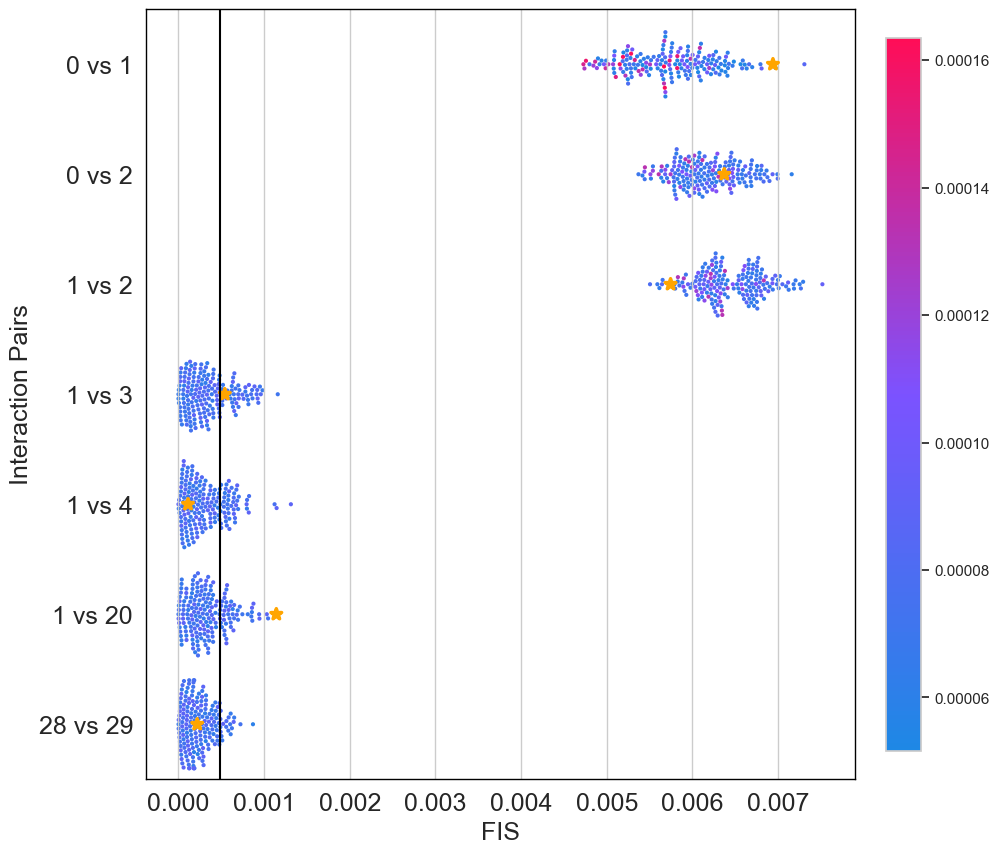

In [15]:
interest_pairs = [(0,1), (0,2), (1,2) , (1,3), (1,4), (1,20), (28, 29)]
swarm_plot(fis_in_r, loss_in_r, fis_ref_l, fis_explainer_mlp.all_pairs, interest_pairs, threshold=.000481, loss=fis_explainer_mlp.loss, epsilon=fis_explainer_mlp.epsilon, save=True, suffix='nid')

In [181]:
fis_in_r_sub = fis_in_r[:,:36]
fis_in_r_sub.sort()
fis_in_r_sub[0,:]

array([0.00491537, 0.00496677, 0.00508466, 0.00508675, 0.0050918 ,
       0.00521326, 0.00523253, 0.00523712, 0.00527617, 0.00529728,
       0.00549308, 0.00557643, 0.00559136, 0.00561043, 0.00564454,
       0.00566076, 0.00576138, 0.00583406, 0.00586059, 0.00587101,
       0.00589098, 0.00593812, 0.00594844, 0.00598141, 0.00599708,
       0.00614139, 0.0062184 , 0.00623783, 0.00626335, 0.00631625,
       0.0063314 , 0.00640819, 0.00646788, 0.00658731, 0.00679351,
       0.00694599])

In [ ]:
loss_emp_all, loss_main_all, loss_main_ref, loss_interaction_pair, pair_idx

In [186]:
pairwise_vis_single(fis_in_r_sub, main_effect_all_diff,  fis_explainer_mlp.ref_main_effects, fis_explainer_mlp.ref_joint_effects, 714)

IndexError: index 28 is out of bounds for axis 1 with size 11

In [28]:
feature_idx_to_pair_idx(fis_explainer_mlp.all_pairs, feature_idx=(1,2))

39

In [29]:
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
lightness = [0.8, 0.7, 0.6, 0.5, 0.4]
e=[5,4.7,4.4,4.1,3.8]
e=e[::-1]
for idx, sub_boundary_rate in enumerate(np.arange(0.2, 1.2, 0.2)):
    loss_emp = loss_emp_all_pair_set[idx][39, :]
    circle_emp, circle_exp = pairwise_vis_loss((loss_emp-fis_explainer_mlp.loss)*sub_boundary_rate,
                                               fis_explainer_mlp.epsilon*e[idx]*sub_boundary_rate)
    circle_emp.sort(key=lambda c:np.arctan2(c[0], c[1]))
    circle_emp.append(circle_emp[0])
    circle_exp.sort(key=lambda c:np.arctan2(c[0], c[1]))
    circle_exp.append(circle_exp[0])
    ax.plot(np.array(circle_emp)[:,0], np.array(circle_emp)[:,1],color=colors_vis(0, lightness[idx]), marker='o', linewidth=3, markersize=2, label='emperial interaction')
    ax.plot(np.array(circle_exp)[:,0], np.array(circle_exp)[:,1],color=colors_vis(1, lightness[idx]), linewidth=3, markersize=1, label='expected interaction')
    ax.set_xticks([])
    ax.grid(False)
    ax.tick_params(axis='both', which='major', labelsize=18)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_linewidth(1)
        ax.spines[location].set_color('black')
# plt.show()
plt.savefig('../results/nid/feature2_feature3_pair_2d.png', bbox_inches='tight')

In [195]:
def pairwise_vis_single(loss_emp_all, loss_main_all, loss_main_ref, loss_interaction_pair, pair_idx):
    loss_diff = loss_emp_all[pair_idx]
    circle_emp, circle_exp = pairwise_vis_loss(loss_diff, loss_main_all, loss_main_ref, loss_interaction_pair, pair_idx)
    print(np.shape(circle_emp))
    fig = plt.figure(figsize=[6,6])
    ax = fig.add_subplot(111)
    circle_emp.sort(key=lambda c:np.arctan2(c[0], c[1]))
    circle_emp.append(circle_emp[0])
    circle_exp.sort(key=lambda c:np.arctan2(c[0], c[1]))
    circle_exp.append(circle_exp[0])
    ax.plot(np.array(circle_emp)[:,0], np.array(circle_emp)[:,1], color=colors_vis(0, 0.4), marker='o', linewidth=2, markersize=2, label='emperial interaction')
    ax.plot(np.array(circle_exp)[:,0], np.array(circle_exp)[:,1], color=colors_vis(1, 0.4), linewidth=1, markersize=1, label='expected interaction')
    ax.fill(np.concatenate((np.array(circle_emp)[:,0], np.array(circle_exp)[:,0][::-1])), np.concatenate((np.array(circle_emp)[:,1], np.array(circle_exp)[:,1][::-1])), alpha=0.5, label='interaction difference')
    plt.show()
def pairwise_vis_loss(loss_emp_all, loss_main_all, loss_main_ref, loss_interaction_pair, pair_idx):
    # loss_main_all = np.arange(0, 1+0.1, 0.1) * boundary
    cord_loss = []
    circle = []
    feature_idx = feature_idx_to_pair_idx(fis_explainer_mlp.all_pairs, pair_idx=pair_idx)
    loss_main_all = loss_main_all[:, feature_idx, :] # [11, 2, 2]
    sum_to_one_pairs = find_all_sum_to_one_pairs(2)
    quadrants = {0: [0,0],1: [0,1],2: [1,0],3: [1,1] }
    for idx,pair in enumerate(sum_to_one_pairs):
        deg = (np.arctan2(pair[0], pair[1]))
        main_loss_1 = loss_main_all[:, 0, :] # [11, 2]
        main_loss_2 = loss_main_all[:, 1, :] # [11, 2]
        main_loss_1_pair = main_loss_1[pair[0]]
        main_loss_2_pair = main_loss_2[pair[1]]
        main_effect_1=loss_main_ref[feature_idx[0]]
        main_effect_2=loss_main_ref[feature_idx[1]]
        for quadrant in quadrants:
            main_loss_sum =  main_loss_1_pair[quadrants[quadrant][0]]+main_loss_2_pair[quadrants[quadrant][1]]
            main_loss_sum = loss_interaction_pair[idx * 4 + quadrant]
            interaction_effect = (loss_emp_all[idx * 4 + quadrant])
            fis = interaction_effect - main_loss_sum

            x = interaction_effect*np.cos(deg).tolist()
            y = interaction_effect*np.sin(deg).tolist()
            cord_loss.append([x, y])
            circle.append([main_loss_sum*np.cos(deg), main_loss_sum*np.sin(deg)])
            deg = deg+np.pi*.5
    return cord_loss, circle


(36, 2)


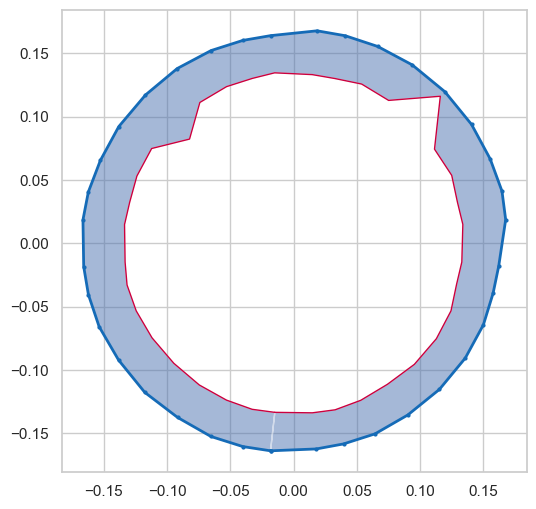

In [196]:
pairwise_vis_single(np.array(joint_effect_all_pair_set[-1]), np.array(main_effect_all_diff[-1]), fis_explainer_mlp.ref_main_effects,fis_explainer_mlp.ref_joint_effects, pair_idx=0)

In [148]:
def _get_fis_in_r(self, pairs, joint_effect_all_pair_set, m_all_subset):
    quadrants = self.quadrants
    fis_rset = np.ones(joint_effect_all_pair_set.shape)
    for i in range(5):
        joint_effect_all_pair_e = joint_effect_all_pair_set[i]
        main_effect_all_diff_e = main_effect_all_diff[i]
        main_effect_all_diff_e_reshaped = main_effect_all_diff_e.transpose((1, 0, 2))
        for idx, pair in enumerate(pairs):
            # fi is 40x11x2, fij_joint is 780x36
            fi = main_effect_all_diff_e_reshaped[pair[0]]
            fj = main_effect_all_diff_e_reshaped[pair[1]]
            fij_joint = joint_effect_all_pair_e[idx]
            # 9 paris
            sum_to_one = find_all_sum_to_one_pairs(self.n_ways)
            for idxk, sum in enumerate(sum_to_one):
                for idxq, quadrant in enumerate(quadrants):
                    # for each pair, find the main effect
                    single_fis = abs(
                        fij_joint[[idxk * 4 + quadrant]] - fi[sum[0]][quadrants[quadrant][0]] - fj[sum[-1]][
                            quadrants[quadrant][-1]])
                    # single_fis = (
                    #     fij_joint[[idxk * 4 + quadrant]] - fi[sum[0]][quadrants[quadrant][0]] - fj[sum[-1]][
                    #         quadrants[quadrant][-1]])
                    fis_rset[i, idx, idxk * 4 + quadrant] = single_fis
    return fis_rset.transpose((1,0,2)).reshape(len(self.all_pairs), -1)


array([[[[1.0143, 1.    ],
         [1.0162, 1.    ],
         [1.0286, 1.    ],
         ...,
         [1.0096, 1.    ],
         [1.0335, 1.    ],
         [1.    , 0.9969]],

        [[1.015 , 1.    ],
         [1.0162, 1.    ],
         [1.0286, 1.    ],
         ...,
         [1.011 , 0.999 ],
         [1.034 , 1.    ],
         [1.002 , 0.9969]],

        [[1.015 , 0.999 ],
         [1.017 , 0.999 ],
         [1.03  , 0.999 ],
         ...,
         [1.012 , 0.998 ],
         [1.034 , 0.999 ],
         [1.004 , 0.9969]],

        ...,

        [[1.0176, 0.996 ],
         [1.02  , 0.996 ],
         [1.033 , 0.995 ],
         ...,
         [1.017 , 0.992 ],
         [1.037 , 0.997 ],
         [1.01  , 0.987 ]],

        [[1.0176, 0.9947],
         [1.0211, 0.996 ],
         [1.0342, 0.995 ],
         ...,
         [1.018 , 0.992 ],
         [1.037 , 0.9957],
         [1.0111, 0.9858]],

        [[1.0201, 0.9943],
         [1.0215, 0.9947],
         [1.0348, 0.994 ],
         ...,
 

In [282]:
# with open('../../../results/nid/nid_fis_main_all.npy', 'wb') as f:
#     np.save(f, main_effects)
# with open('../../../results/nid/nid_points_all_min.npy', 'wb') as f:
#     np.save(f, points_all_negative)
# with open('../../../results/nid/nid_points_all_max.npy', 'wb') as f:
#     np.save(f, points_all_positive)
# with open('../../../results/nid/nid_m_all_set.npy', 'wb') as f:
#     np.save(f, m_all_sub_set)
# with open('../../../results/nid/nid_m_all.npy', 'wb') as f:
#     np.save(f, m_all)

/home/sichao/anaconda3/envs/work_env/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [12]:
with open('../../../results/nid/nid_fis_pairwise_all.npy', 'wb') as f:
    np.save(f, joint_effect_all_pair_set)

In [13]:
with open('../../../results/nid/nid_loss_pairwise_all.npy', 'wb') as f:
    np.save(f, loss_emp_all_pair_set)

In [22]:
with open('../results/nid/nid_loss_pairwise_all.npy', 'rb') as f:
    loss_emp_all_pair_set = np.load(f)
with open('../results/nid/nid_fis_pairwise_all.npy', 'rb') as f:
    joint_effect_all_pair_set = np.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../../../results/nid/nid_loss_pairwise_all.npy'